In [1]:
import numpy as np
import os
import re
import sys
import random
import time
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [8]:
data_frame1 = pd.read_csv('result_cache_size_he_0_nolog_blosc.csv',index_col='Time Steps')
data_frame1["Normalized Compression Calls"] = data_frame1["Compression Calls"]/data_frame1["Number of iterations"]
data_frame1["Normalized Decompression Calls"] = data_frame1["Decompression Calls"]/data_frame1["Number of iterations"]
data_frame2 = pd.read_csv('result_cache_size_he_1_nolog_blosc.csv',index_col='Time Steps')
data_frame3 = pd.read_csv('result_cache_size_he_2_nolog_blosc.csv',index_col='Time Steps')
data_frame4 = pd.read_csv('result_cache_size_he_4_nolog_blosc.csv',index_col='Time Steps')
data_frame5 = pd.read_csv('result_cache_size_he_7_nolog_blosc.csv',index_col='Time Steps')
data_frame6 = pd.read_csv('result_cache_size_he_11_nolog_blosc.csv',index_col='Time Steps')
all_data_frames = [data_frame1,data_frame2,data_frame3,data_frame4,data_frame5,data_frame6]
for i in all_data_frames:
    i["Normalized Compression Calls"] = i["Compression Calls"]/i["Number of iterations"]
    i["Normalized Decompression Calls"] = i["Decompression Calls"]/i["Number of iterations"]
    i["Compression Time (Cache compress)"] = i["Compression Time (Cache)"]-(i["Compression Time (Evictions)"]+i["Compression Time (Put)"])
    i["Decompression Time (Cache decompress)"] = i["Decompression Time (Cache)"]-(i["Decompression Time (Evictions)"]+i["Decompression Time (Put)"])

In [9]:
all_data_frames[5]

,Compression Calls,Decompression Calls,Compression Time (No Cache),Compression Time (Cache),Compression Time (Evictions),Compression Time (Put),Compression Time (Update),Decompression Time (No Cache),Decompression Time (Cache),Decompression Time (Evictions),Decompression Time (Put),Decompression Time (Get),Total Time (compression),Total Time (decompression),Cache Invalidates,Number of iterations,Normalized Compression Calls,Normalized Decompression Calls,Compression Time (Cache compress),Decompression Time (Cache decompress)
Time Steps,,,,,,,,,,,,,,,,,,,,
0.1,1506,579,0,2.769095,0.802742,0.010204,0.005138,0,1.712582,0.344949,0.002933,0.006606,2.774234,1.719188,914,8,188.250000,72.375,1.956150,1.364701
0.2,2017,955,0,4.068263,1.401154,0.013810,0.005680,0,3.138399,0.715304,0.005052,0.007748,4.073944,3.146147,1612,10,201.700000,95.500,2.653299,2.418043
0.3,2017,955,0,4.106174,1.409992,0.012271,0.005155,0,3.145418,0.752868,0.004465,0.007468,4.111329,3.152886,1612,10,201.700000,95.500,2.683911,2.388085
0.4,2017,955,0,4.238759,1.465674,0.011588,0.004875,0,3.161824,0.754601,0.004372,0.007395,4.243634,3.169218,1612,10,201.700000,95.500,2.761497,2.402851
0.5,2017,955,0,4.070399,1.390100,0.011297,0.004772,0,3.178370,0.781097,0.004280,0.007374,4.075171,3.185745,1612,10,201.700000,95.500,2.669001,2.392993
0.6,2017,955,0,4.177144,1.511765,0.011077,0.004749,0,3.105864,0.757371,0.004303,0.007318,4.181893,3.113181,1612,10,201.700000,95.500,2.654302,2.344191
0.7,2218,1056,0,4.428134,1.511029,0.013518,0.005586,0,3.352016,0.819636,0.005080,0.008344,4.433720,3.360361,1783,11,201.636364,96.000,2.903586,2.527301
0.8,2218,1056,0,4.553163,1.534296,0.012791,0.005525,0,3.441977,0.867595,0.004903,0.008236,4.558687,3.450213,1783,11,201.636364,96.000,3.006075,2.569479
0.9,2218,1056,0,4.770353,1.649169,0.012788,0.005513,0,3.574588,0.900600,0.004944,0.008469,4.775867,3.583056,1783,11,201.636364,96.000,3.108396,2.669043


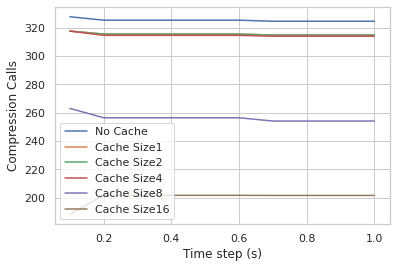

In [10]:
cache_size = [1,2,4,8,16]
ax = all_data_frames[0].plot(y='Normalized Compression Calls',label='No Cache')
for i in range(1,len(all_data_frames)):
    all_data_frames[i].plot(ax=ax,y='Normalized Compression Calls',label='Cache Size'+str(cache_size[i-1]))
plt.xlabel('Time step (s)')
plt.ylabel('Compression Calls')
plt.savefig('CompCalls_he.png')

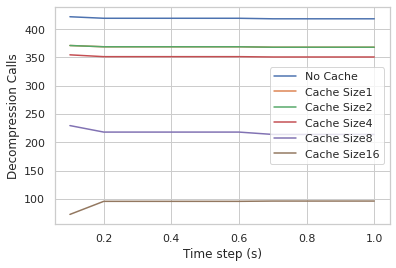

In [11]:
cache_size = [1,2,4,8,16]
ax = all_data_frames[0].plot(y='Normalized Decompression Calls',label='No Cache')
for i in range(1,len(all_data_frames)):
    all_data_frames[i].plot(ax=ax,y='Normalized Decompression Calls',label='Cache Size'+str(cache_size[i-1]))
plt.xlabel('Time step (s)')
plt.ylabel('Decompression Calls')
plt.savefig('DecompCalls_he.png')

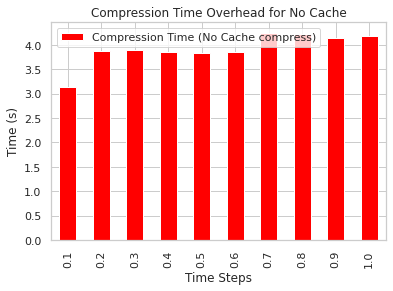

In [12]:
all_df = []
df = pd.DataFrame({'Compression Time (No Cache compress)':all_data_frames[0]['Compression Time (No Cache)']})
df.plot(kind='bar', stacked=True, color=['red'])
plt.ylabel('Time (s)')
plt.title('Compression Time Overhead for No Cache')
plt.savefig('Comp_time_no_cache_he.png')
all_df.append(df)

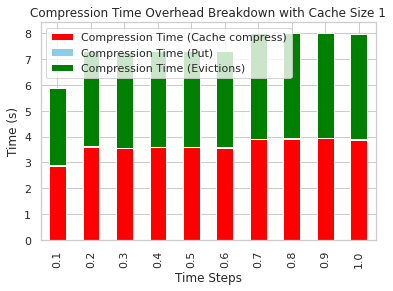

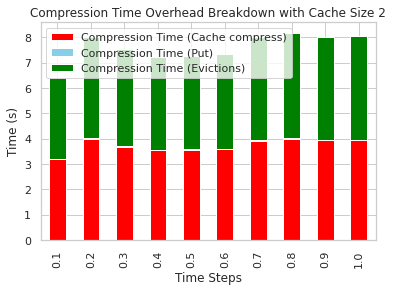

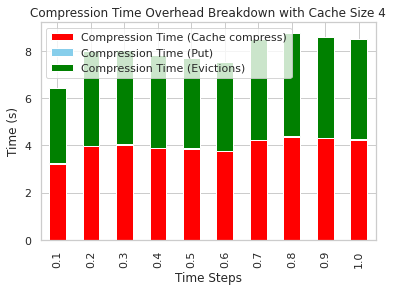

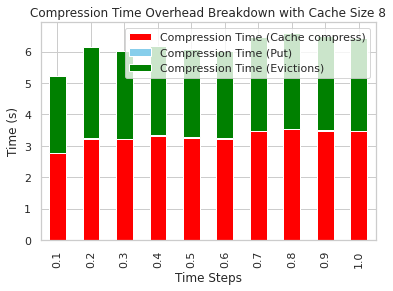

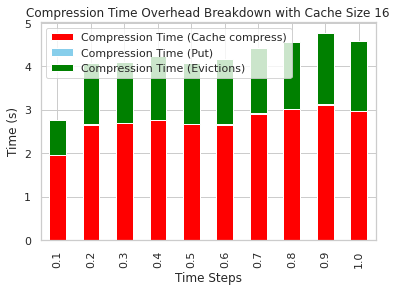

In [13]:
# create stacked bar chart for monthly temperatures
for i in range(1,len(all_data_frames)):
    df = pd.DataFrame({'Compression Time (Cache compress)':all_data_frames[i]['Compression Time (Cache compress)'],'Compression Time (Put)':all_data_frames[i]['Compression Time (Put)'],'Compression Time (Evictions)':all_data_frames[i]['Compression Time (Evictions)']})
    df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
    plt.ylabel('Time (s)')
    plt.title('Compression Time Overhead Breakdown with Cache Size '+str(cache_size[i-1]))
    plt.savefig('Comp_time_he_cache_size_'+str(cache_size[i-1])+'.png')
    all_df.append(df)

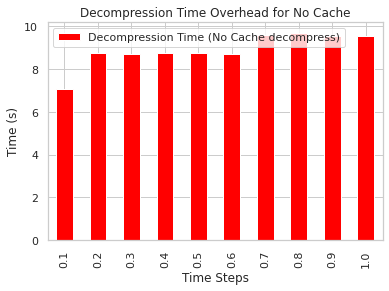

In [14]:
all_df = []
df = pd.DataFrame({'Decompression Time (No Cache decompress)':all_data_frames[0]['Decompression Time (No Cache)']})
df.plot(kind='bar', stacked=True, color=['red'])
plt.ylabel('Time (s)')
plt.title('Decompression Time Overhead for No Cache')
plt.savefig('Decomp_time_no_cache_he.png')
all_df.append(df)

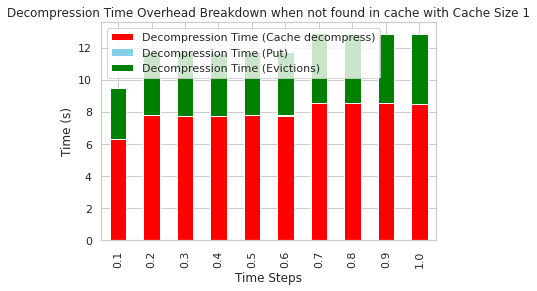

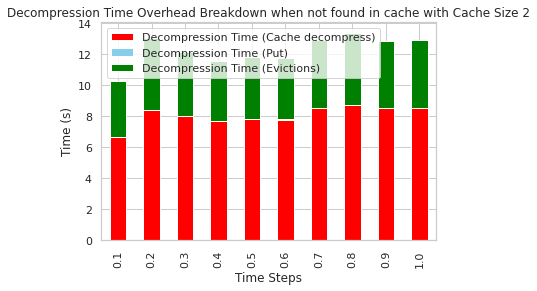

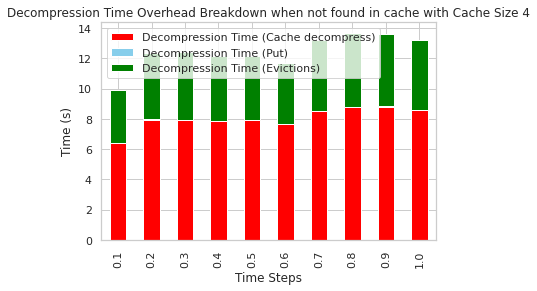

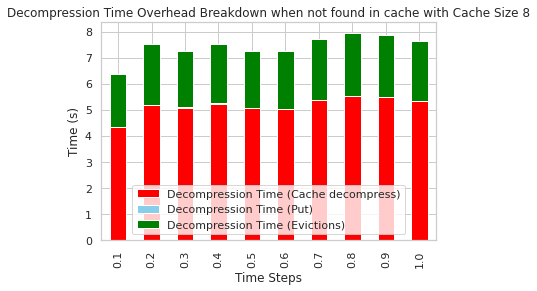

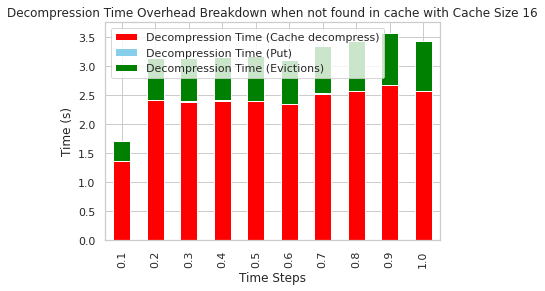

In [15]:
# create stacked bar chart for monthly temperatures
for i in range(1,len(all_data_frames)):
    df = pd.DataFrame({'Decompression Time (Cache decompress)':all_data_frames[i]['Decompression Time (Cache decompress)'],'Decompression Time (Put)':all_data_frames[i]['Decompression Time (Put)'],'Decompression Time (Evictions)':all_data_frames[i]['Decompression Time (Evictions)']})
    df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
    plt.ylabel('Time (s)')
    plt.title('Decompression Time Overhead Breakdown when not found in cache with Cache Size '+str(cache_size[i-1]))
    # ax = plt.gca()
    # ax.set_ylim([ymin, ymax])
    plt.savefig('Decomp_time_he_cache_size_'+str(cache_size[i-1])+'.png')
    all_df.append(df)

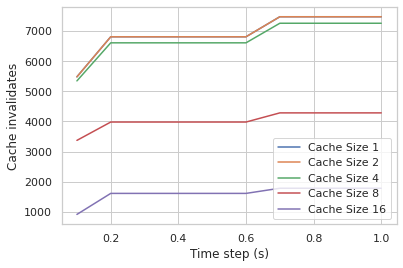

In [16]:
cache_size = [1,2,4,8,16]
ax = all_data_frames[1].plot(y='Cache Invalidates',label='Cache Size 1')
for i in range(2,len(all_data_frames)):
    plt.savefig('CacheInvalidates_he.png')
    all_data_frames[i].plot(ax=ax,y='Cache Invalidates',label='Cache Size '+str(cache_size[i-1]))
    plt.xlabel('Time step (s)')
    plt.ylabel('Cache invalidates')

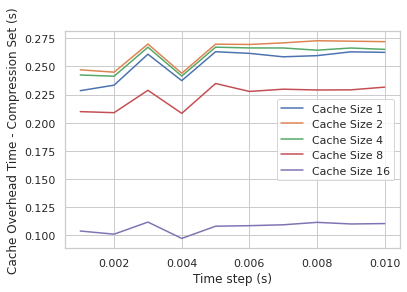

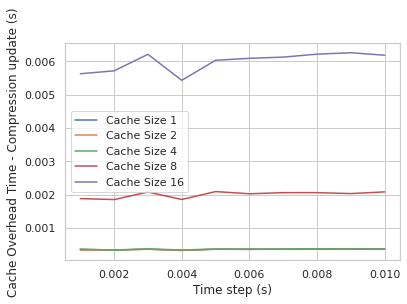

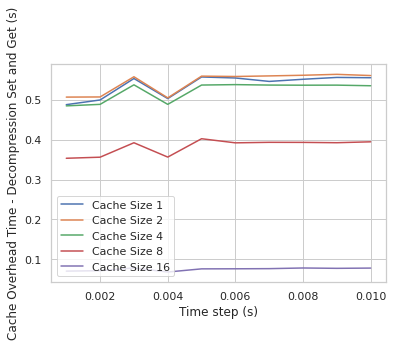

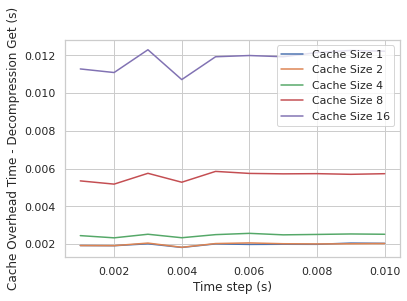